Buatlah program dengan kriteria sbb (10):
Inputan Output
Nama Nama
NIM NIM
Usia atau
Tanggal lahir ( jika inputan yang
dipilih tanggal maka poin akan
mendapat poin tambahan sebesar 5
point)
Usia
Angka favorit Luas lingkaran berdasarkan angka
favorit
Keterangan :
Jika inputan berupa tanggal lahir maka anda harus menghitung usia anda saat
assessment ini dilakukan.
Untuk menghitung luas lingkaran anda dapat menggunakan rumus luas lingkaran
yaitu 3,14 x jari-jari x jari-jari

In [1]:
from datetime import datetime

def hitung_usia(tanggal_lahir):
    today = datetime.now()
    lahir = datetime.strptime(tanggal_lahir, "%Y-%m-%d")
    usia = today.year - lahir.year - ((today.month, today.day) < (lahir.month, lahir.day))
    return usia

def hitung_luas_lingkaran(jari_jari):
    return 3.14 * jari_jari * jari_jari

nama = input("Masukkan Nama: ")
nim = input("Masukkan NIM: ")

pilihan = input("Apakah Anda ingin memasukkan usia atau tanggal lahir? (usia/tanggal): ").strip().lower()

if pilihan == "tanggal":
    tanggal_lahir = input("Masukkan Tanggal Lahir (format YYYY-MM-DD): ")
    usia = hitung_usia(tanggal_lahir)
    print(f"Usia Anda: {usia} tahun (Anda mendapatkan 5 poin tambahan!)")
else:
    usia = int(input("Masukkan Usia: "))

angka_favorit = float(input("Masukkan Angka Favorit: "))

luas_lingkaran = hitung_luas_lingkaran(angka_favorit)

print("\n=== Hasil ===")
print(f"Nama: {nama}")
print(f"NIM: {nim}")
print(f"Usia: {usia} tahun")
print(f"Luas Lingkaran berdasarkan angka favorit ({angka_favorit}): {luas_lingkaran}")


Masukkan Nama: egi Rizkiyansyah
Masukkan NIM: 2311110042
Apakah Anda ingin memasukkan usia atau tanggal lahir? (usia/tanggal): 19
Masukkan Usia: 19
Masukkan Angka Favorit: 30

=== Hasil ===
Nama: egi Rizkiyansyah
NIM: 2311110042
Usia: 19 tahun
Luas Lingkaran berdasarkan angka favorit (30.0): 2826.0


Lakukan eksplorasi data pada data genangan air Surabaya.csv dengan
membuat program-program python dan interpretasi dari output program
yang anda buat. Sehingga anda dapat menjawab pertanyaan-pertanyaan
berikut ini :
a. Tentukan berapa nilai maksimum, minimum dan rata-rata dari luas
genangan, tinggi genangan dan lama genangan air. ( 5)
b. Buatlah pie chart untuk membandingkan banyaknya peristiwa genangan
berdasarkan rayonnya. (5)
c. Bagaimana hubungan antara luas genangan dan skor genangan, dan apakah
ada hubungan antara luas genangan air dan lama genangan air? (5)

Index(['_id', 'Lokasi', 'Kecamatan', 'Kelurahan', 'Rayon', 'Luas genangan',
       'Tinggi genangan', 'Lama genangan', 'Skor Luas Genangan',
       'Skor Tinggi Genangan', 'Skor Lama Genangan'],
      dtype='object')
Kolom tidak ditemukan: 'Luas Genangan'


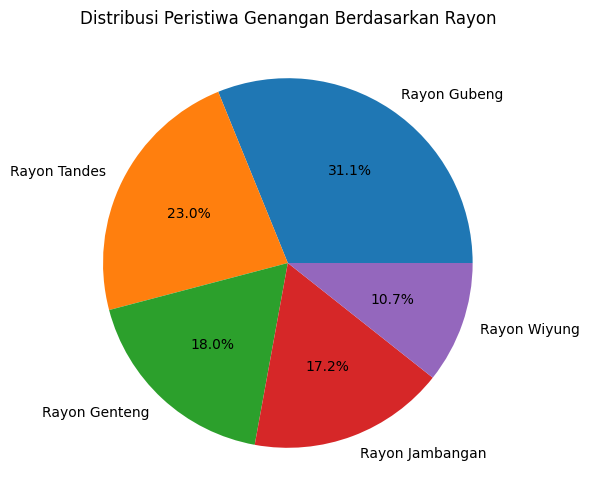

Error saat membuat scatter plot: Could not interpret value `Luas Genangan` for `x`. An entry with this name does not appear in `data`.
Error saat membuat scatter plot: Could not interpret value `Luas Genangan` for `x`. An entry with this name does not appear in `data`.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/data genangan air Surabaya.csv')

print(data.columns)

data.columns = data.columns.str.strip()

try:
    max_luas = data['Luas Genangan'].max()
    min_luas = data['Luas Genangan'].min()
    mean_luas = data['Luas Genangan'].mean()

    print(f'Maksimum Luas Genangan: {max_luas}')
    print(f'Minimum Luas Genangan: {min_luas}')
    print(f'Rata-rata Luas Genangan: {mean_luas}')
except KeyError as e:
    print(f'Kolom tidak ditemukan: {e}')

try:
    rayon_counts = data['Rayon'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(rayon_counts, labels=rayon_counts.index, autopct='%1.1f%%')
    plt.title('Distribusi Peristiwa Genangan Berdasarkan Rayon')
    plt.show()
except KeyError as e:
    print(f'Kolom tidak ditemukan: {e}')

try:
    sns.scatterplot(data=data, x='Luas Genangan', y='Skor Genangan')
    plt.title('Hubungan antara Luas Genangan dan Skor Genangan')
    plt.xlabel('Luas Genangan')
    plt.ylabel('Skor Genangan')
    plt.show()
except ValueError as e:
    print(f'Error saat membuat scatter plot: {e}')

try:
    sns.scatterplot(data=data, x='Luas Genangan', y='Lama Genangan')
    plt.title('Hubungan antara Luas Genangan dan Lama Genangan Air')
    plt.xlabel('Luas Genangan')
    plt.ylabel('Lama Genangan')
    plt.show()
except ValueError as e:
    print(f'Error saat membuat scatter plot: {e}')


Lakukan praproses pada data modified_data genangan air Surabaya.csv
dengan membuat program python dan interpretasi dari output program yang
anda buat, sehingga anda dapat menjawaba pertanyaan-pertanyaan berikut ini:
Petunjuk : untuk membaca data tersebut anda dapat menggunakan perintah
membaca data dengan opsi sep=’;’
a. Apakah ada duplikasi data? Jika ya/tidak apa yang anda lakukan? (5)
b. Apakah ada missing value atau noise atau nilai bias pada data tersebut? Jika
ya/tidak apa yang anda lakukan? (5)
c. Jika mengubah tipe data dari Kecamatan, Kelurahan dan Rayon menjadi
angka, apa yang dapat dilakukan? (5)

In [10]:
import pandas as pd

data = pd.read_csv('/data genangan air Surabaya.csv', sep=';')

print("Beberapa baris awal dari dataset:")
print(data.head())
print("\nNama kolom:")
print(data.columns)

duplicates = data.duplicated().sum()
print(f"\nJumlah duplikasi data: {duplicates}")

if duplicates > 0:
    print("Tindakan: Menghapus duplikasi data.")
    data = data.drop_duplicates()
else:
    print("Tidak ada duplikasi data.")

missing_values = data.isnull().sum()
print("\nJumlah missing values di setiap kolom:")
print(missing_values)

if missing_values.sum() > 0:
    print("Tindakan: Mengisi missing values dengan nilai rata-rata untuk kolom numerik dan modus untuk kolom kategorikal.")
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        data[column].fillna(data[column].mean(), inplace=True)

    for column in data.select_dtypes(include=['object']).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)
else:
    print("Tidak ada missing values.")

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in ['Kecamatan', 'Kelurahan', 'Rayon']:
    if column in data.columns:
        data[column] = le.fit_transform(data[column])
        print(f"\nKolom '{column}' telah diubah menjadi angka.")
    else:
        print(f"\nKolom '{column}' tidak ditemukan dalam dataset.")

print("\nDataset setelah praproses:")
print(data.head())


Beberapa baris awal dari dataset:
  _id,Lokasi,Kecamatan,Kelurahan,Rayon,Luas genangan,Tinggi genangan,Lama genangan,Skor Luas Genangan,Skor Tinggi Genangan,Skor Lama Genangan
0  1,Jl. Pakis Agosari (Yamaha),Dukuh Pakis,Dukuh...                                                                                         
1  2,Jl. Mayjend Sungkono - Darmo Park I,Dukuh Pa...                                                                                         
2  3,Jl. Mayjend Sungkono (Pom Bensin),Dukuh Paki...                                                                                         
3  4,Kp. Kebraon,Karangpilang,Warugunung,Rayon Wi...                                                                                         
4  5,Jl. Lakar Santri RW.001,Lakarsantri,Bangking...                                                                                         

Nama kolom:
Index(['_id,Lokasi,Kecamatan,Kelurahan,Rayon,Luas genangan,Tinggi genangan,Lama genangan,Skor Luas Ge